In [212]:
from dataset.dataset import load_affnist_dataset

X_train, X_test, Y_train, Y_test = load_affnist_dataset()
inputs = X_test.reshape(-1, 1, 40, 40)
inputs.shape

(2000, 1, 40, 40)

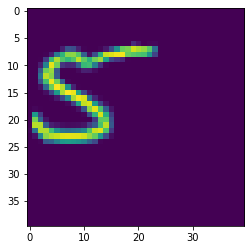

In [213]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(X_test[np.random.randint(0, 1000)].reshape(40, 40), interpolation="nearest")
plt.show()

In [214]:

import pickle

with open("saved_models/networks/conv/model_8_2", "rb") as pickle_file:
    model_8_2 = pickle.load(pickle_file)
    
with open("saved_models/networks/conv/model_8_4", "rb") as pickle_file:
    model_8_4 = pickle.load(pickle_file)

with open("saved_models/networks/conv/model_16_2", "rb") as pickle_file:
    model_16_2 = pickle.load(pickle_file)
    
with open("saved_models/networks/conv/model_16_4", "rb") as pickle_file:
    model_16_4 = pickle.load(pickle_file)

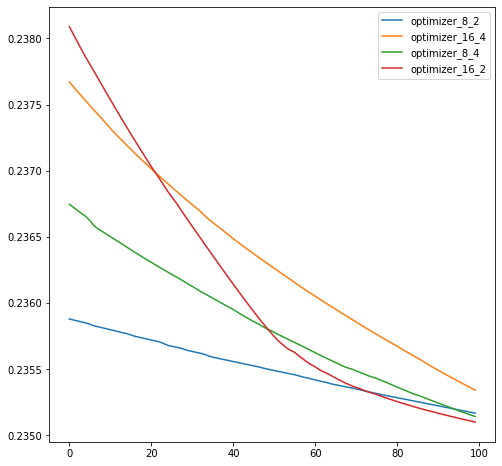

In [215]:
import pickle
import os
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))


path = "saved_models/optimizers/conv/"

for file in os.listdir(path):
    with open(path + file, "rb") as pickle_file:
        optimizer = pickle.load(pickle_file)
        plt.plot(optimizer.loss, label=file)


plt.legend()
plt.show()

In [216]:
result = model_8_4.forward_slice(inputs[5:15], 1)
feature_maps = np.mean(result, axis=0)
result.shape, feature_maps.shape

((10, 8, 36, 36), (8, 36, 36))

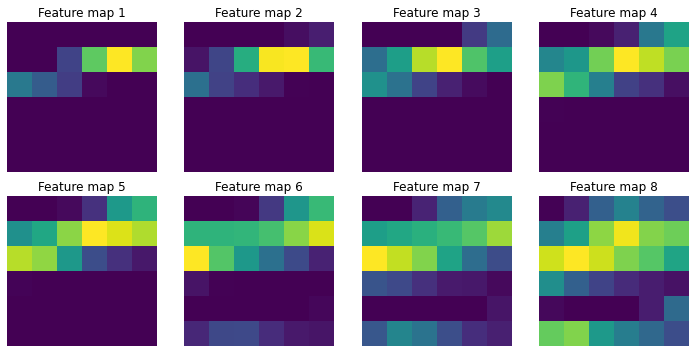

In [217]:

fig, axes = plt.subplots(2, 4, figsize=(10, 5))

axes = axes.flatten()

average_data = np.average(feature_maps, axis=0)

for i in range(8):
    ax = axes[i]
    ax.imshow(average_data[i].reshape(6,6), interpolation="nearest")
    ax.set_title(f"Feature map {i+1}")
    ax.axis('off')  # Turn off axis labels

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

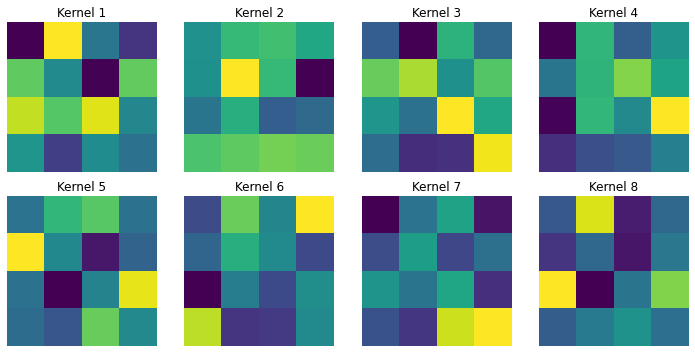

In [218]:
conv_layer_1 = model_8_4.layers[0]
kernel = conv_layer_1.kernel

kernel = kernel.reshape((8,4,4))
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
axes = axes.flatten()

for i in range(8):
    ax = axes[i]
    ax.imshow(kernel[i], interpolation="nearest")
    ax.set_title(f"Kernel {i+1}")
    ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

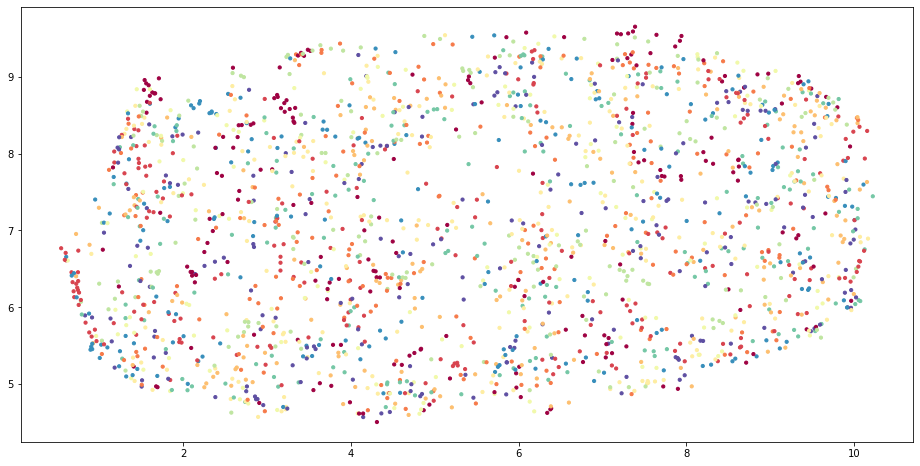

In [219]:
import umap

plt.figure(figsize=(16, 8))
embedding = umap.UMAP().fit_transform(model_8_4.forward_slice(inputs, 1).reshape(2000, -1))
plt.scatter(*embedding.T, s=10, c=Y_test, cmap="Spectral", alpha=1.0)
plt.show

In [220]:
encoded = model_16_4.forward_slice(inputs, 4)

In [221]:
encoded_reshaped = encoded.reshape(2000, -1)
encoded_reshaped.shape

(2000, 576)

In [222]:
from models.neural_network import ClassificationNeuralNetwork
from models.optimizer import Optimizer
from models.metrics import CategoricalCrossEntropyLoss, Accuracy

network = ClassificationNeuralNetwork(
    input_dim=encoded_reshaped.shape[1],
    hidden_dim=800,
    output_dim=10,
    number_of_hidden_layers=1,
)

optimizer = Optimizer(
    network,
    accuracy=Accuracy(),
    loss=CategoricalCrossEntropyLoss(),
    learning_rate=0.85,
    batch_size=128,
    epochs=30,
    reshape=False,
)

optimizer.fit(encoded_reshaped, Y_test)

Epoch 0  -- accuracy 0.140 - loss 2.297
Epoch 1  -- accuracy 0.159 - loss 2.277
Epoch 2  -- accuracy 0.169 - loss 2.247
Epoch 3  -- accuracy 0.166 - loss 2.248
Epoch 4  -- accuracy 0.180 - loss 2.219
Epoch 5  -- accuracy 0.181 - loss 2.226
Epoch 6  -- accuracy 0.198 - loss 2.185
Epoch 7  -- accuracy 0.208 - loss 2.163
Epoch 8  -- accuracy 0.200 - loss 2.184
Epoch 9  -- accuracy 0.229 - loss 2.123
Epoch 10  -- accuracy 0.228 - loss 2.117
Epoch 11  -- accuracy 0.247 - loss 2.097
Epoch 12  -- accuracy 0.276 - loss 2.012
Epoch 13  -- accuracy 0.279 - loss 2.039
Epoch 14  -- accuracy 0.267 - loss 2.069
Epoch 15  -- accuracy 0.321 - loss 1.923
Epoch 16  -- accuracy 0.305 - loss 1.920
Epoch 17  -- accuracy 0.338 - loss 1.862
Epoch 18  -- accuracy 0.370 - loss 1.837
Epoch 19  -- accuracy 0.352 - loss 1.878
Epoch 20  -- accuracy 0.377 - loss 1.687
Epoch 21  -- accuracy 0.369 - loss 1.816
Epoch 22  -- accuracy 0.441 - loss 1.603
Epoch 23  -- accuracy 0.435 - loss 1.634
Epoch 24  -- accuracy 0.47

In [223]:
accuracy = optimizer.accuracy
loss = optimizer.loss

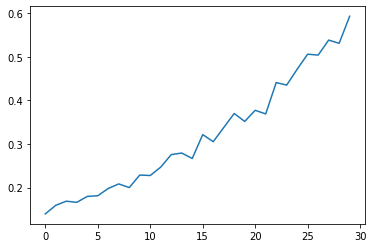

In [224]:
plt.plot(accuracy)
plt.show()

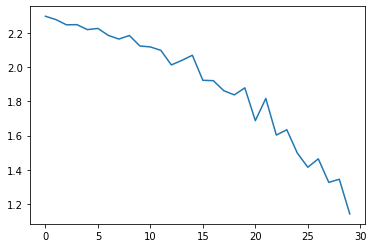

In [225]:
plt.plot(loss)
plt.show()